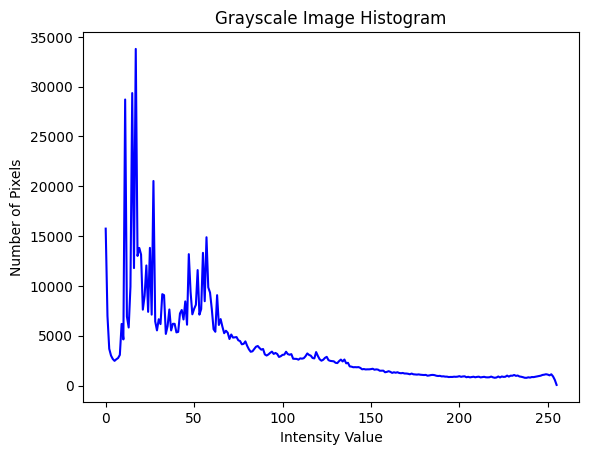

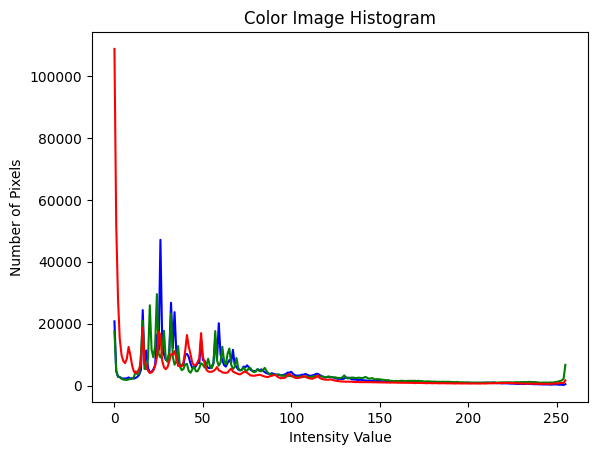

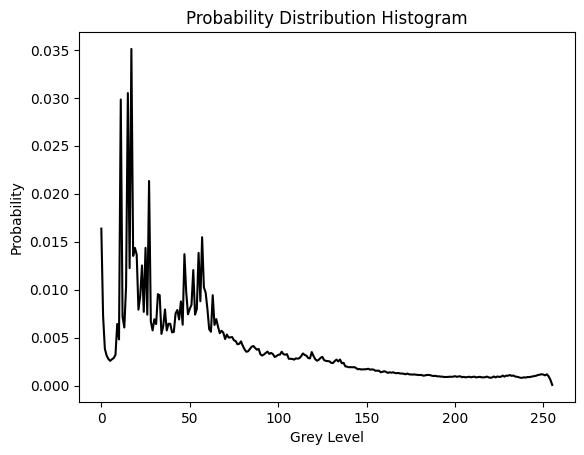





Bright image


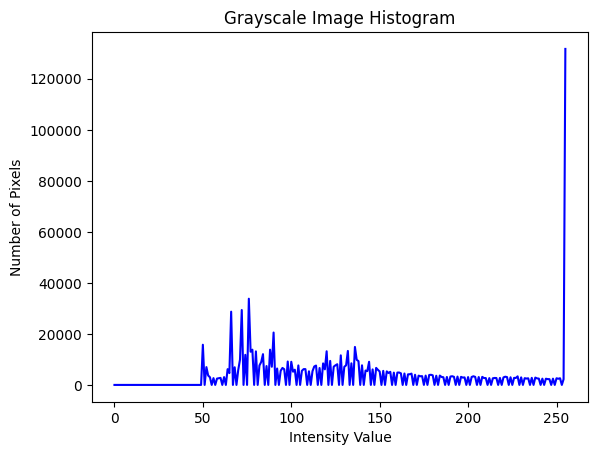





Dark image


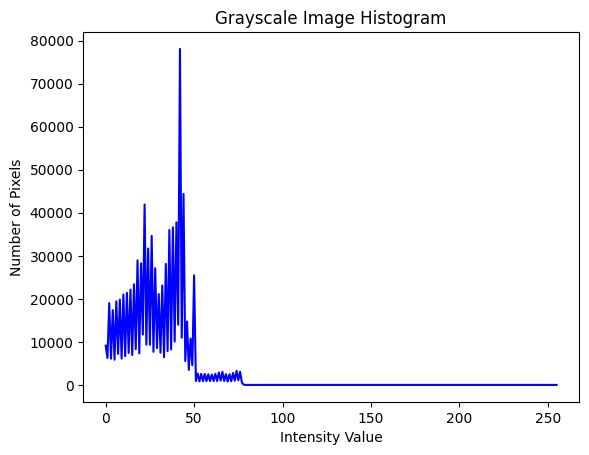

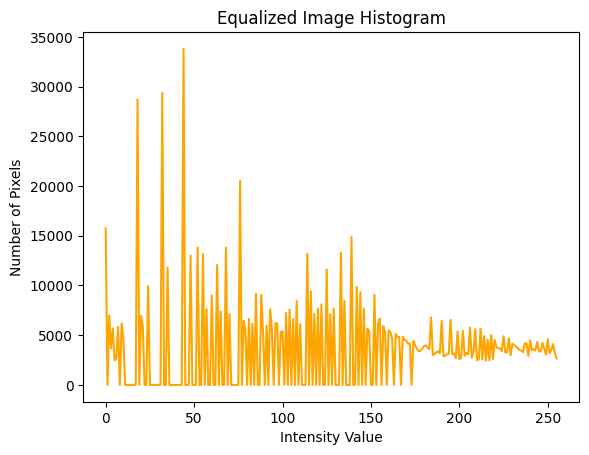

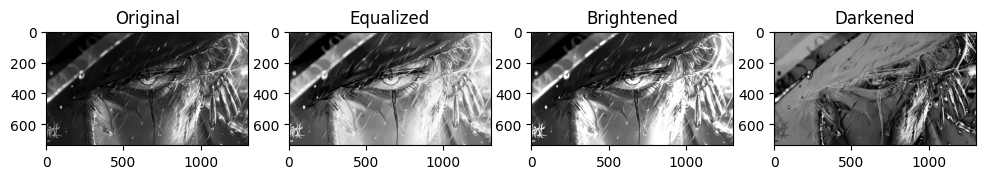

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_histogram(image, color=False):
    if color:
        channels = ('b', 'g', 'r')
        for i, col in enumerate(channels):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
        plt.title('Color Image Histogram')
    else:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='blue')
        plt.title('Grayscale Image Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Number of Pixels')
    plt.show()

def compute_probability_histogram(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist /= hist.sum()
    plt.plot(hist, color='black')
    plt.title('Probability Distribution Histogram')
    plt.xlabel('Grey Level')
    plt.ylabel('Probability')
    plt.show()

def histogram_equalization(image):
    equalized = cv2.equalizeHist(image)
    return equalized

def compute_hist(image, color = False):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist, color='orange')
    plt.title('Equalized Image Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Number of Pixels')
    plt.show()

def main():
    image_color = cv2.imread('/content/zoro.jpg')
    image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    # Task 1: Compute and visualize histograms
    compute_histogram(image_gray, color=False)
    compute_histogram(image_color, color=True)

    # Task 2: Compute probability distribution histogram
    compute_probability_histogram(image_gray)

    # Task 3: Histogram changes for bright and dark images
    bright_image = cv2.convertScaleAbs(image_gray, alpha=1.5, beta=50)
    dark_image = cv2.convertScaleAbs(image_gray, alpha=0.5, beta=-50)

    print("\n\n\n")
    print("Bright image")
    compute_histogram(bright_image, color=False)
    print("\n\n\n")
    print("Dark image")
    compute_histogram(dark_image, color=False)

    # Task 4: Contrast enhancement using histogram equalization
    equalized_image = histogram_equalization(image_gray)

    compute_hist(equalized_image, color=False)

    # Display results
    plt.figure(figsize=(12, 4))
    plt.subplot(141), plt.imshow(image_gray, cmap='gray'), plt.title('Original')
    plt.subplot(142), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized')
    plt.subplot(143), plt.imshow(bright_image, cmap='gray'), plt.title('Brightened')
    plt.subplot(144), plt.imshow(dark_image, cmap='gray'), plt.title('Darkened')
    plt.show()

if __name__ == '__main__':
    main()


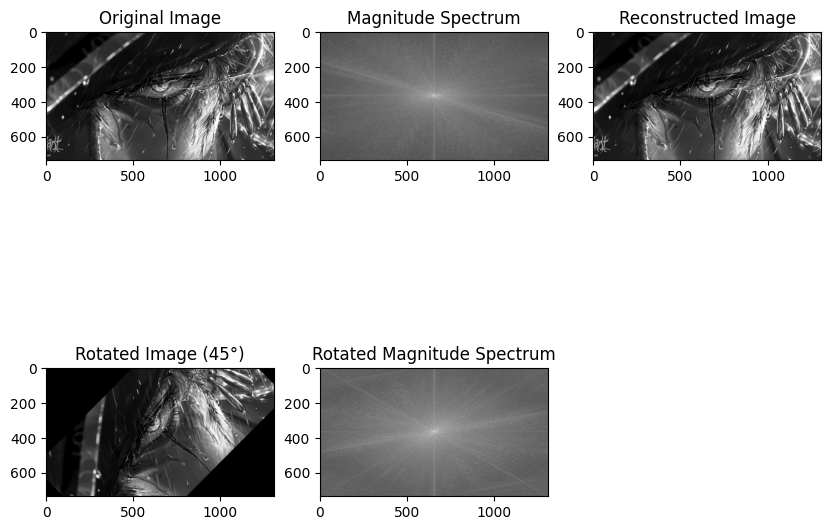

In [ ]:


def perform_fft(image):
    # Task 1a: Compute the DFT of the input image using FFT
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return fshift, magnitude_spectrum

def perform_ifft(fshift):
    # Task 2a: Apply the Inverse Fourier Transform (IFFT) to reconstruct the original image
    f_ishift = np.fft.ifftshift(fshift)
    img_reconstructed = np.fft.ifft2(f_ishift)
    return np.abs(img_reconstructed)

def rotate_image(image, angle):
    # Task 3a: Rotate the input image by a given angle
    (h, w) = image.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# Load grayscale image
image = cv2.imread('/content/zoro.jpg', cv2.IMREAD_GRAYSCALE)

# Task 1b: Compute FFT and display magnitude spectrum
fshift, magnitude_spectrum = perform_fft(image)

# Task 2b: Perform IFFT to reconstruct the image
reconstructed_image = perform_ifft(fshift)

# Task 3a: Rotate image by 45 degrees
rotated_image = rotate_image(image, 45)

# Task 3b: Compute FFT of rotated image
rotated_fshift, rotated_magnitude_spectrum = perform_fft(rotated_image)

# Plot results
plt.figure(figsize=(10, 8))
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
plt.subplot(2, 3, 3), plt.imshow(reconstructed_image, cmap='gray'), plt.title('Reconstructed Image')
plt.subplot(2, 3, 4), plt.imshow(rotated_image, cmap='gray'), plt.title('Rotated Image (45°)')
plt.subplot(2, 3, 5), plt.imshow(rotated_magnitude_spectrum, cmap='gray'), plt.title('Rotated Magnitude Spectrum')
plt.show()